In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\TRISHAA\Downloads\IOT-temp.csv")

In [3]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [4]:
df.drop(['id',"room_id/id"],axis=1,inplace=True)

In [5]:
df.rename(columns={'noted_date':'date', 'out/in':'place'}, inplace=True)

In [6]:
df.head()

,date,temp,place
0,08-12-2018 09:30,29,In
1,08-12-2018 09:30,29,In
2,08-12-2018 09:29,41,Out
3,08-12-2018 09:29,41,Out
4,08-12-2018 09:29,31,In


In [17]:
df.drop(["place"],axis=1,inplace=True)

In [18]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

In [19]:
df.head()

,date,temp
0,2018-12-08 09:30:00,29
1,2018-12-08 09:30:00,29
2,2018-12-08 09:29:00,41
3,2018-12-08 09:29:00,41
4,2018-12-08 09:29:00,31


In [20]:
ts_data = df.set_index(['date']) 

In [21]:
ts_data.head()

,temp
date,
2018-12-08 09:30:00,29
2018-12-08 09:30:00,29
2018-12-08 09:29:00,41
2018-12-08 09:29:00,41
2018-12-08 09:29:00,31


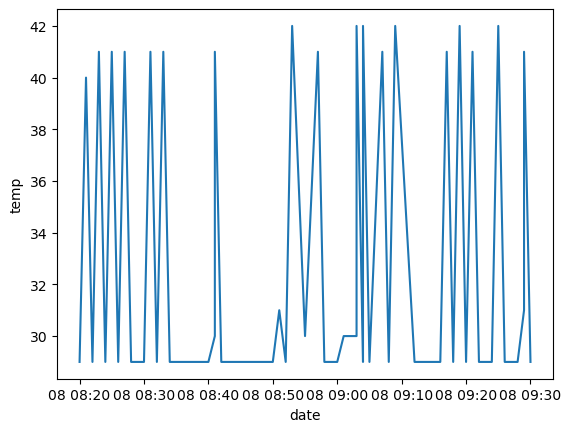

In [24]:
import matplotlib.pyplot as plt
plt.xlabel("date")
plt.ylabel("temp")
plt.plot(ts_data.head(100))

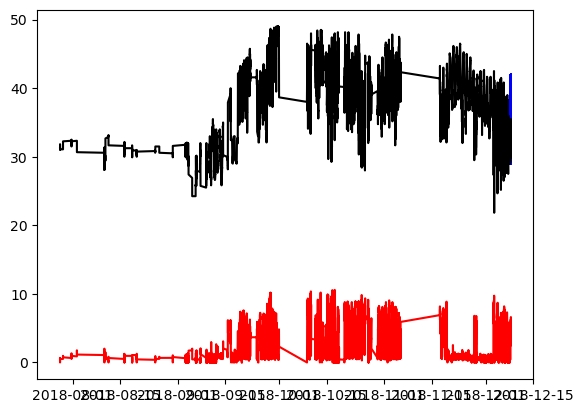

In [26]:
rol_mean=ts_data.rolling(window=12).mean() #window->Size of the moving window. 
rol_std = ts_data.rolling(window=12).std()
plt.plot(ts_data.head(100), c='blue')
plt.plot(rol_mean, c='black')
plt.plot(rol_std, c='red')

In [27]:
from statsmodels.tsa.stattools import adfuller #tsa->time series analysis
dftest= adfuller(ts_data['temp'])
print(dftest)

(-6.06304669231625, 1.1997933298824219e-07, 68, 97537, {'1%': -3.4304170460656684, '5%': -2.8615696333023712, '10%': -2.5667857727713517}, 452686.9733726549)


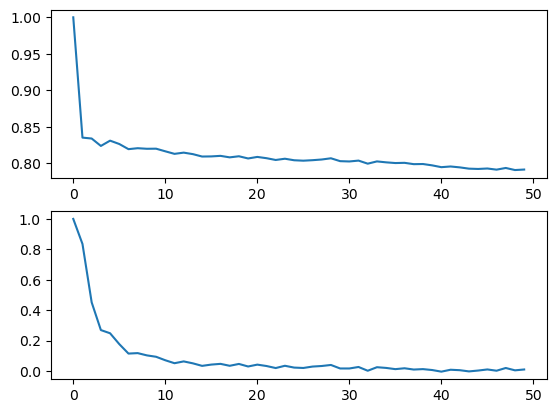

In [28]:
#to plot for actual data(including the intermediate(refer notes))
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(ts_data.dropna())
pacf_plot = pacf(ts_data.dropna())

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

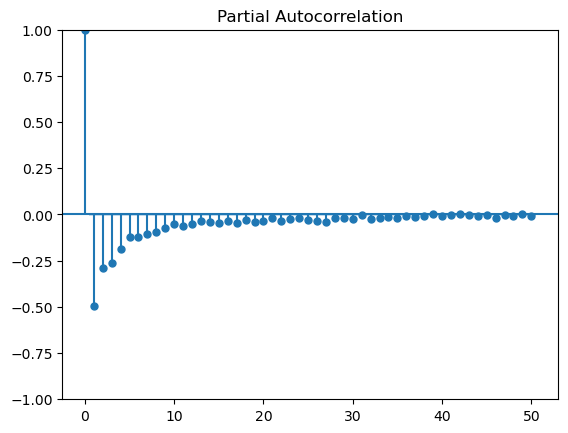

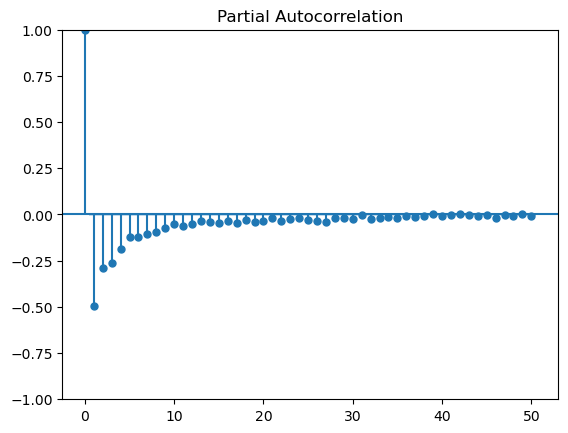

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf ,plot_acf
plot_pacf(df.temp.diff().dropna())

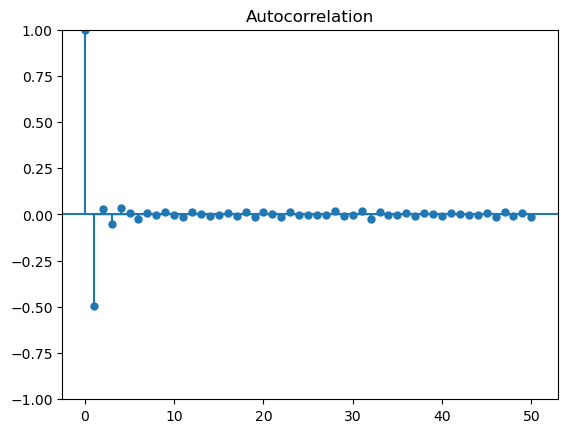

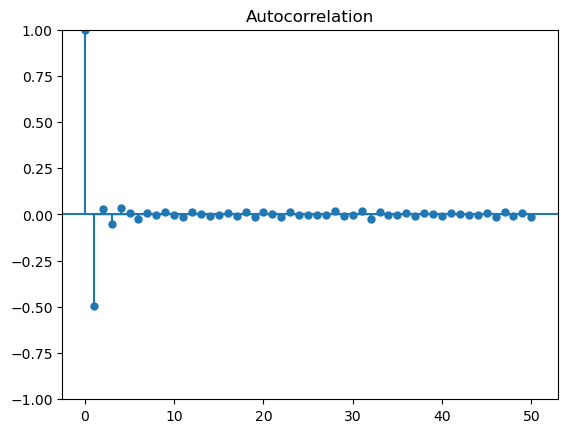

In [33]:
plot_acf(df.temp.diff().dropna())

In [39]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_data.head(100),order=(1,1,2))  #without considering seasonality into consideration we get a constant line for prediction which is wrong
model_fit = model.fit()

C:\Users\TRISHAA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TRISHAA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TRISHAA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TRISHAA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\TRISHAA\anaconda3

In [52]:
res = model_fit.forecast(100)

C:\Users\TRISHAA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [53]:
res = pd.DataFrame(res)
res.columns=['temp']
ts_data_pred = pd.DataFrame(ts_data)
ts_data_pred = ts_data_pred.append(res)

C:\Users\TRISHAA\AppData\Local\Temp\ipykernel_9516\2420504085.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_data_pred = ts_data_pred.append(res)


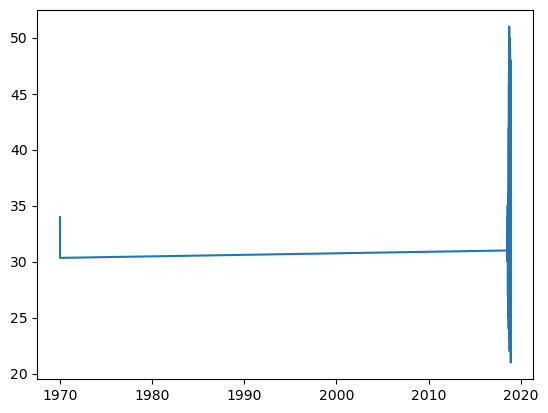

In [54]:
plt.plot(ts_data_pred)